In [1]:
curr_dir = '/user_data/vayzenbe/GitHub_Repos/kornet'
import pandas as pd
import numpy as np
import sys
vone_dir = '/user_data/vayzenbe/GitHub_Repos/vonenet'
cornet_dir = '/user_data/vayzenbe/GitHub_Repos/CORnet'
vit_dir = '/user_data/vayzenbe/GitHub_Repos/Cream/EfficientViT'
sys.path.insert(1, curr_dir)
sys.path.insert(1, vone_dir)
sys.path.insert(1, cornet_dir)
sys.path.insert(1, vit_dir)
import vonenet
import cornet
from torchvision.models import convnext_large, ConvNeXt_Large_Weights, vit_b_16, ViT_B_16_Weights
from torchvision.models import resnet50, ResNet50_Weights, resnext50_32x4d, ResNeXt50_32X4D_Weights
from torchvision.models import alexnet, AlexNet_Weights, vgg19, VGG19_Weights
import torch



import torch.nn as nn
import torchvision
import load_stim
from glob import glob as glob
from model_loader import load_model as load_model
import two_stream_dataloader

from classification.model.build import EfficientViT_M0
import two_stream_nn

In [2]:
model = two_stream_nn.TwoStream()
model = torch.nn.DataParallel(model).cuda()

Neuronal distributions gabor parameters


/user_data/vayzenbe/GitHub_Repos/vonenet/vonenet/params.py:59: RuntimeWarning: invalid value encountered in true_divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)
/home/vayzenbe/anaconda3/envs/ml/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484775609/work/aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Model:  VOneCORnet-S feedforward


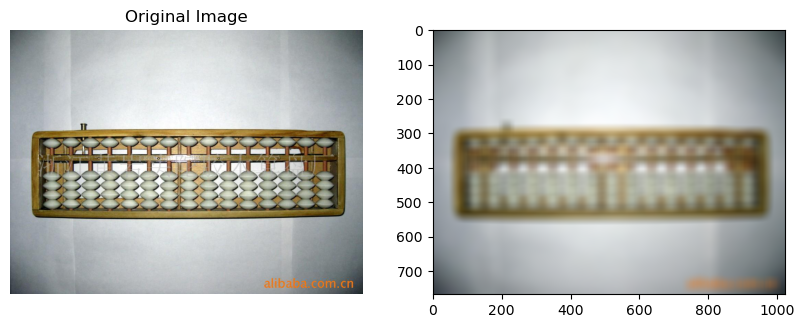

In [24]:
im_folder = '/user_data/vayzenbe/image_sets/development_images/val'

#load a single image annd apply gaussian blue
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms


im = Image.open('/user_data/vayzenbe/image_sets/development_images/val/n02666196/ILSVRC2012_val_00049012.JPEG')

blurrer = transforms.GaussianBlur(kernel_size=35, sigma=15)
blurred_im = blurrer(im)
#blurred_imgs = [blurrer(im) for _ in range(4)]


#plot blurred_imgs to see the effect
plt.figure(figsize=(10, 10))
#plot original image and blurred images side by side
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blurred_im)



In [25]:

transform_ventral = torchvision.transforms.Compose([
                torchvision.transforms.Resize((224,224)),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                 std=[0.229, 0.224, 0.225])])
transform_dorsal = torchvision.transforms.Compose([
                torchvision.transforms.Resize((224,224)),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Grayscale(num_output_channels=3),
                torchvision.transforms.GaussianBlur(kernel_size=35, sigma=15),
                torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                 std=[0.229, 0.224, 0.225])])


dataset = two_stream_dataloader.ImageFolderDataset('/user_data/vayzenbe/image_sets/development_images/val', transform_ventral=transform_ventral, transform_dorsal=transform_dorsal)

testloader = torch.utils.data.DataLoader(dataset, batch_size=24, shuffle=False, num_workers = 4, pin_memory=True, drop_last=True)



with torch.no_grad():
    
    for ventral_image, dorsal_image, label in testloader:
        # move tensors to GPU if CUDA is available
        
        ventral_image= ventral_image.cuda()
        dorsal_image = dorsal_image.cuda()
        label = label.cuda()

        
        
        
        out = model(ventral_image,ventral_image)
        print(out.shape)

torch.Size([24, 565])
torch.Size([24, 565])
torch.Size([24, 565])
torch.Size([24, 565])
torch.Size([24, 565])
torch.Size([24, 565])
torch.Size([24, 565])
torch.Size([24, 565])
torch.Size([24, 565])
torch.Size([24, 565])


In [26]:
ventral_image== dorsal_image

tensor([[[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],

         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],

         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False,

In [21]:
from classification.model.build import EfficientViT_M0
model = EfficientViT_M0()
#model = torch.nn.DataParallel(model).cuda()
layer_call = "getattr(getattr(getattr(model,'module'),'head'),'bn')"
transform = torchvision.transforms.Compose([
                torchvision.transforms.Resize((224,224)),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                    std=[0.229, 0.224, 0.225])])

In [32]:
model = vonenet.get_model(model_arch='cornets_ff', pretrained=False).module
ventral = model

Neuronal distributions gabor parameters


/user_data/vayzenbe/GitHub_Repos/vonenet/vonenet/params.py:59: RuntimeWarning: invalid value encountered in true_divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)
/home/vayzenbe/anaconda3/envs/ml/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484775609/work/aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Model:  VOneCORnet-S feedforward


In [35]:
ventral = vonenet.get_model(model_arch='cornets_ff', pretrained=False).module
classifier = nn.Sequential(*list(ventral .children())[-1])
vone  = nn.Sequential(*list(ventral .children())[:-1])
#recomvbine model and classifier
#dorsal = nn.Sequential(dorsal, classifier)

Neuronal distributions gabor parameters


/user_data/vayzenbe/GitHub_Repos/vonenet/vonenet/params.py:59: RuntimeWarning: invalid value encountered in true_divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)


Model:  VOneCORnet-S feedforward


TypeError: torch.nn.modules.container.Sequential() argument after * must be an iterable, not CORnetSBackEnd_FF

In [62]:
nn.Sequential(*list(ventral.model.children())[:-1])

Sequential(
  (0): CORblock_S(
    (conv_input): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (skip): Conv2d(128, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (norm_skip): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv1): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (nonlin1): ReLU(inplace=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (nonlin2): ReLU(inplace=True)
    (conv3): Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (nonlin3): ReLU(inplace=True)
    (output): Identity()
    (norm1_0): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (norm2_0): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (norm3_0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): CORblock_S(
    (conv_input): Conv2d(128,

In [63]:
ventral = vonenet.get_model(model_arch='cornets_ff', pretrained=False).module
nn.Sequential(*list(ventral.children())[:-1], nn.Sequential(*list(ventral.model.children())[:-1]),nn.AdaptiveAvgPool2d(output_size=1))

Neuronal distributions gabor parameters


/user_data/vayzenbe/GitHub_Repos/vonenet/vonenet/params.py:59: RuntimeWarning: invalid value encountered in true_divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)


Model:  VOneCORnet-S feedforward


Sequential(
  (0): VOneBlock(
    (simple_conv_q0): GFB()
    (simple_conv_q1): GFB()
    (simple): ReLU(inplace=True)
    (complex): Identity()
    (gabors): Identity()
    (noise): ReLU(inplace=True)
    (output): Identity()
  )
  (1): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (2): Sequential(
    (0): CORblock_S(
      (conv_input): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (skip): Conv2d(128, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (norm_skip): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (nonlin1): ReLU(inplace=True)
      (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (nonlin2): ReLU(inplace=True)
      (conv3): Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (nonlin3): ReLU(inplace=True)
      (output): Identity()
      (nor

In [49]:
#remove classifier layer
classifier = nn.Sequential(*list(ventral.children())[-1])

TypeError: torch.nn.modules.container.Sequential() argument after * must be an iterable, not CORnetSBackEnd_FF

In [50]:
ventral

Sequential(
  (vone_block): VOneBlock(
    (simple_conv_q0): GFB()
    (simple_conv_q1): GFB()
    (simple): ReLU(inplace=True)
    (complex): Identity()
    (gabors): Identity()
    (noise): ReLU(inplace=True)
    (output): Identity()
  )
  (bottleneck): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (model): CORnetSBackEnd_FF(
    (V2): CORblock_S(
      (conv_input): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (skip): Conv2d(128, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (norm_skip): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (nonlin1): ReLU(inplace=True)
      (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (nonlin2): ReLU(inplace=True)
      (conv3): Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (nonlin3): ReLU(inplace=True)
      (

In [28]:
#remove last layer from model
model = EfficientViT_M0()
classifier = nn.Sequential(*list(model.children())[-1])[:-1]
model = nn.Sequential(*list(model.children())[:-1])

#recomvbine model and classifier
model = nn.Sequential(model, classifier)

In [18]:
def extract_acts(model, image_dir, transform, layer_call):
    print('extracting features...')
    

    #set up hook to specified layer
    def _store_feats(layer, inp, output):
        """An ugly but effective way of accessing intermediate model features
        """
        #avgpool = nn.AdaptiveAvgPool2d(output_size=(1,768))
        #output = avgpool(output)
        

        output = output.cpu().numpy()
        print(output.shape)
        
        _model_feats.append(np.reshape(output, (len(output), -1)))

    try:
        m = model.module
    except:
        m = model
    #model_layer = getattr(getattr(m, layer), sublayer)
    model_layer = eval(layer_call)
    model_layer.register_forward_hook(_store_feats)



    #Iterate through each image and extract activations

    imNum = 0
    n=0

    

    
    test_dataset = load_stim.load_stim(image_dir, transform=transform)
    testloader = torch.utils.data.DataLoader(test_dataset, batch_size=24, shuffle=False, num_workers = 4, pin_memory=True)
    


    with torch.no_grad():
        
        for data, _ in testloader:
            # move tensors to GPU if CUDA is available
            
            data= data.cuda()
            
            _model_feats = []
            model(data)
            #output = model(data)
            
            out = np.vstack(_model_feats)
            

            if n == 0:
                acts = out
                #label_list = label
            else:
                acts= np.append(acts, out,axis = 0)
                #label_list = np.append(label_list, label)
                
            
            n = n + 1
            break

    return acts

In [19]:
acts = extract_acts(model, '/user_data/vayzenbe/GitHub_Repos/kornet/stim/test/Outline_Black_Filled', transform, layer_call)

extracting features...
(6, 192)
(6, 192)
(6, 192)
(6, 192)


In [10]:
layer_call

"getattr(getattr(getattr(model,'module'),'encoder'),'ln')"

In [11]:
model

DataParallel(
  (module): VisionTransformer(
    (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (encoder): Encoder(
      (dropout): Dropout(p=0.0, inplace=False)
      (layers): Sequential(
        (encoder_layer_0): EncoderBlock(
          (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (self_attention): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (dropout): Dropout(p=0.0, inplace=False)
          (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): MLPBlock(
            (0): Linear(in_features=768, out_features=3072, bias=True)
            (1): GELU(approximate=none)
            (2): Dropout(p=0.0, inplace=False)
            (3): Linear(in_features=3072, out_features=768, bias=True)
            (4): Dropout(p=0.0, inplace=False)
          )
        )
        (encoder_layer_1): EncoderBlock(
          (ln_1): Lay

In [ ]:
model

In [10]:
model_arch = ['vonenet_r_ecoset','vonenet_r_stylized-ecoset','vonenet_ff_ecoset','vonenet_ff_stylized-ecoset', 'ShapeNet','SayCam', 'convnext','vit']
model_arch = ['vonenet_ff_ecoset']

#append '_imagenet_sketch' to each string in model_arch
#model_arch = model_arch+ [f'{model}_imagenet_sketch' for model in model_arch]

df = pd.DataFrame(columns=['model','cat','stim_num','features'])
#loop through models and load acts

for model in model_arch:
    act_files = glob(f'{curr_dir}/modelling/acts/{model}_*')

    #remove files with imagenet_sketch
    act_files = [act_file for act_file in act_files if 'imagenet_sketch' not in act_file]
    
    for act_file in act_files:
        act = np.load(act_file)
        cat = act_file.split('/')[-1].split('_')[-1]
        #stim = act_file.split('/')[-1].split('_')[2]
        df = df.append({'model':model,'cat':cat,'stim_num':int(act.shape[0]),'features':int(act.shape[1])},ignore_index=True)

/tmp/ipykernel_32574/168332372.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model':model,'cat':cat,'stim_num':int(act.shape[0]),'features':int(act.shape[1])},ignore_index=True)
/tmp/ipykernel_32574/168332372.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model':model,'cat':cat,'stim_num':int(act.shape[0]),'features':int(act.shape[1])},ignore_index=True)
/tmp/ipykernel_32574/168332372.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model':model,'cat':cat,'stim_num':int(act.shape[0]),'features':int(act.shape[1])},ignore_index=True)
/tmp/ipykernel_32574/168332372.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

In [8]:
df.reset_index()

,index,model,cat,stim_num,features
0,0,vonenet_ff_ecoset,imagenet,250,512
1,1,vonenet_ff_ecoset,imagenet,30,512
2,2,vonenet_ff_ecoset,imagenet,250,512
3,3,vonenet_ff_ecoset,lamp.npy,500,512
4,4,vonenet_ff_ecoset,guitar.npy,500,512
...,...,...,...,...,...
72,72,vonenet_ff_ecoset,imagenet,250,512
73,73,vonenet_ff_ecoset,bird.npy,500,512
74,74,vonenet_ff_ecoset,imagenet,250,512
75,75,vonenet_ff_ecoset,tree.npy,500,512


In [2]:
act_dir = f'{curr_dir}/modelling/acts'

act_files = glob(f'{act_dir}/*.npy')

#create df to count number values in acts
df = pd.DataFrame(columns=['model','cat','stim','features'])

for act_file in act_files:
    act = np.load(act_file)
    act_name = act_file.split('/')[-1].split('.')[0]
    model_name = act_name.split('_')[0]
    cat = act_name.split('_')[-1]
    
    #add to df
    df = df.append({'model':model_name,'cat':cat,'stim':int(act.shape[0]),'features':int(act.shape[1])},ignore_index=True)
    
    

/tmp/ipykernel_27698/505257728.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model':model_name,'cat':cat,'stim':int(act.shape[0]),'features':int(act.shape[1])},ignore_index=True)
/tmp/ipykernel_27698/505257728.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model':model_name,'cat':cat,'stim':int(act.shape[0]),'features':int(act.shape[1])},ignore_index=True)
/tmp/ipykernel_27698/505257728.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model':model_name,'cat':cat,'stim':int(act.shape[0]),'features':int(act.shape[1])},ignore_index=True)
/tmp/ipykernel_27698/505257728.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

In [7]:
source_dir = f'/user_data/vayzenbe/image_sets/ecoset'
im_list = glob(f'{source_dir}/train/*duck/*')
print(im_list[0])

IndexError: list index out of range

In [11]:
path

['/user_data/vayzenbe/image_sets/ecoset/train/0154_bear']

In [2]:
models = ['vonecornet_s','cornet_s','voneresnet', 'vit','convnext','resnet50','resnext50','alexnet','vgg19', 'ShapeNet','SayCam']
weights_dir = f'{curr_dir}/modelling/weights'

In [28]:
def load_model(model_arch):    
    """
    load model
    """
    if model_arch == 'vonecornet_s':
        model = vonenet.get_model(model_arch='cornets', pretrained=True).module
        layer_call = "getattr(getattr(getattr(getattr(model,'module'),'model'),'decoder'),'avgpool')"
        transform = torchvision.transforms.Compose([
                torchvision.transforms.Resize(224),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                 std=[0.5, 0.5, 0.5])])

    elif model_arch == 'cornet_s':
        model = cornet.get_model('s', pretrained=True).module
        layer_call = "getattr(getattr(getattr(model,'module'),'decoder'),'avgpool')"

        transform = torchvision.transforms.Compose([
                torchvision.transforms.Resize(224),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                 std=[0.229, 0.224, 0.225])])
    
    if model_arch == 'voneresnet':
        model = vonenet.get_model(model_arch='resnet50', pretrained=True).module
        layer_call = "getattr(getattr(getattr(model,'module'),'model'),'avgpool')"
        transform = torchvision.transforms.Compose([
                torchvision.transforms.Resize(224),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                 std=[0.5, 0.5, 0.5])])

    elif model_arch == 'convnext':
        model = convnext_large(weights=ConvNeXt_Large_Weights.DEFAULT)
        transform = ConvNeXt_Large_Weights.IMAGENET1K_V1.transforms()
        layer_call = "getattr(getattr(model,'module'),'avgpool')"

    elif model_arch == 'vit':
        model = vit_b_16(weights=ViT_B_16_Weights.DEFAULT)
        transform = ViT_B_16_Weights.DEFAULT.transforms()
        layer_call = "getattr(getattr(getattr(model,'module'),'encoder'),'ln')"
        #layer_call = "getattr(getattr(getattr(getattr(getattr(getattr(model,'module'),'encoder'),'layers'),'encoder_layer_11'),'mlp'),'3')"

    elif model_arch == 'resnet50':
        model = resnet50(weights=ResNet50_Weights.DEFAULT)
        transform = ResNet50_Weights.DEFAULT.transforms()
        layer_call = "getattr(getattr(model,'module'),'avgpool')"
    
    elif model_arch == 'resnext50':
        model = resnext50_32x4d(weights=ResNeXt50_32X4D_Weights.DEFAULT)
        transform = ResNeXt50_32X4D_Weights.DEFAULT.transforms()
        layer_call = "getattr(getattr(model,'module'),'avgpool')"
    
    elif model_arch == 'alexnet':
        model = alexnet(weights=AlexNet_Weights.DEFAULT)
        transform = AlexNet_Weights.DEFAULT.transforms()
        layer_call = "getattr(getattr(getattr(model,'module'),'classifier'),'5')"

    elif model_arch == 'vgg19':
        model = vgg19(weights=VGG19_Weights.DEFAULT)
        transform = VGG19_Weights.DEFAULT.transforms()
        layer_call = "getattr(getattr(getattr(model,'module'),'classifier'),'5')"

    elif model_arch == 'ShapeNet':
        model = resnet50(weights=None)
        checkpoint = torch.load(f'{weights_dir}/ShapeNet_ResNet50_Weights.pth.tar')
        model.load_state_dict(checkpoint)
        transform = ResNet50_Weights.DEFAULT.transforms()
        layer_call = "getattr(getattr(model,'module'),'avgpool')"

    elif model_arch == 'SayCam':
        model = resnext50_32x4d(weights=None)
        transform = ResNeXt50_32X4D_Weights.DEFAULT.transforms()
        
        checkpoint = torch.load(f'{weights_dir}/SayCam_ResNext_Weights.pth.tar')
        model.load_state_dict(checkpoint)
        layer_call = "getattr(getattr(model,'module'),'avgpool')"

        

    model = torch.nn.DataParallel(model).cuda()

    
    #checkpoint = torch.load(f'{weights_dir}/{model_arch}_{train_set}_best_1.pth.tar')
    #model.load_state_dict(checkpoint['state_dict'])

    return model, transform, layer_call

In [34]:
model, transform, layer_call = load_model('vonecornet_s')
print(layer_call)

Neuronal distributions gabor parameters
Model:  VOneCORnet-S
getattr(getattr(getattr(getattr(model,'module'),'model'),'decoder'),'avgpool')


In [35]:
model

DataParallel(
  (module): Sequential(
    (vone_block): VOneBlock(
      (simple_conv_q0): GFB()
      (simple_conv_q1): GFB()
      (simple): ReLU(inplace=True)
      (complex): Identity()
      (gabors): Identity()
      (noise): ReLU(inplace=True)
      (output): Identity()
    )
    (bottleneck): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (model): CORnetSBackEnd(
      (V2): CORblock_S(
        (conv_input): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (skip): Conv2d(128, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (norm_skip): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (nonlin1): ReLU(inplace=True)
        (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (nonlin2): ReLU(inplace=True)
        (conv3): Conv2d(512, 128, kernel_size=(1, 1), stride=

In [36]:
layer = eval(layer_call)

In [38]:

for model_name in models:
    print(model_name)
    try:
        model, transform, layer_call = load_model(model_name)
        
        
        
    except:
        print(model_name, 'failed to load')


    try:
        model_layer = eval(layer_call)

    except:
        print(model_name, 'eval failed')
        

    



vonecornet_s
Neuronal distributions gabor parameters
Model:  VOneCORnet-S
cornet_s
voneresnet
Neuronal distributions gabor parameters
Model:  VOneResnet50
vit
convnext
resnet50
resnext50
alexnet
vgg19
ShapeNet
SayCam


In [5]:
model

DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): S

In [9]:
layer_call = "getattr(getattr(model,'module'),'avgpool')"


In [4]:
layer = eval(layer_call)

In [6]:
models = ['ShapeNet','SayCam']
for model in models:
    print(model)

    model, transform, layer_call = load_model(model)

    print(model)



ShapeNet
DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequentia

In [17]:
model = cornet.get_model('s', pretrained=True)

In [20]:
layer_call = "getattr(getattr(getattr(model,'module'),'decoder'),'avgpool')"
model_layer = eval(layer_call)

In [18]:
model.module.decoder.avgpool

AdaptiveAvgPool2d(output_size=1)

In [15]:
test = 'cornetsdfdsfds'

test == 'cornets*'

False

In [16]:
'cornet' in test

True

In [2]:
curr_dir = '/user_data/vayzenbe/GitHub_Repos/kornet'
stim_dir = f'{curr_dir}/stim/_things'


layer = ['ln','avgpool','avgpool',['decoder','avgpool']]


In [3]:
cats = glob(f'{stim_dir}/*/')
cats

['/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/butterfly/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/dog/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/lamp/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/bike/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/truck/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/fish/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/duck/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/bear/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/elephant/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/turtle/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/key/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/squirrel/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/frog/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/hand/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/spoon/',
 '/user_data/vayzenbe/GitHub_Repos/korne

In [13]:
def load_model(model_arch):    
    """
    load model
    """
    if model_arch == 'cornets':
        model = vonenet.get_model(model_arch='cornets', pretrained=False).module
        layer_call = "getattr(getattr(getattr(getattr(model,'module'),'model'),'decoder'),'avgpool')"

    elif model_arch == 'cornets_ff':
        model = vonenet.get_model(model_arch='cornets_ff', pretrained=False).module
        layer_call = "getattr(getattr(getattr(getattr(model,'module'),'model'),'decoder'),'avgpool')"
        

    elif model_arch == 'convnext':
        model = convnext_large(weights=None)
        transform = ConvNeXt_Large_Weights.IMAGENET1K_V1.transforms()
        layer_call = "getattr(getattr(model,'module'),'avgpool')"
    elif model_arch == 'vit':
        model = vit_b_16(weights=None)
        transform = ViT_B_16_Weights.DEFAULT.transforms()
        layer_call = "getattr(getattr(getattr(model,'module'),'encoder'),'ln')"
        layer_call = "getattr(getattr(model, 'encoder'),'ln')"
        #layer_call = "getattr(getattr(getattr(getattr(getattr(getattr(model,'module'),'encoder'),'layers'),'encoder_layer_11'),'mlp'),'3')"


    if model_arch == 'cornets' or model_arch == 'cornets_ff':

        transform = torchvision.transforms.Compose([
                torchvision.transforms.Resize(256),
                torchvision.transforms.CenterCrop(224),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                 std=[0.5, 0.5, 0.5]),
            ])

    #model = torch.nn.DataParallel(model).cuda()

    
    #checkpoint = torch.load(f'{weights_dir}/{model_arch}_{train_set}_best_1.pth.tar')
    #model.load_state_dict(checkpoint['state_dict'])

    return model, transform, layer_call

In [3]:
transform = torchvision.transforms.Compose([
                torchvision.transforms.Resize(256),
                torchvision.transforms.CenterCrop(224),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                 std=[0.5, 0.5, 0.5]),
            ])

image_dir = '/user_data/vayzenbe/GitHub_Repos/kornet/stim/test/Outline'
test_dataset = load_stim.load_stim(image_dir, transform=transform)

['OBJ (01).png', 'OBJ (04).png', 'OBJ (06).png', 'OBJ (07).png', 'OBJ (08).png', 'OBJ (10).png', 'OBJ (11).png', 'OBJ (12).png', 'OBJ (14).png', 'OBJ (16).png', 'OBJ (17).png', 'OBJ (18).png', 'OBJ (19).png', 'OBJ (20).png', 'OBJ (21).png', 'OBJ (22).png', 'OBJ (23).png', 'OBJ (25).png', 'OBJ (27).png', 'OBJ (29).png', 'OBJ (30).png', 'OBJ (31).png', 'OBJ (32).png', 'OBJ (38).png', 'OBJ (41).png', 'OBJ (42).png', 'OBJ (44).png', 'OBJ (45).png', 'OBJ (46).png', 'OBJ (47).png']


In [17]:
cat = 'airplane'
#['vit','convnext','cornets','cornets_ff']
for model_type in ['vit']:
    model, transform, layer_call = load_model(model_type)
    acts = extract_acts(model, f'{stim_dir}/{cat}', transform, layer_call)

    print(acts.shape)


extracting features...
(12, 197, 768)
(12, 151296)


In [19]:
model

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate=none)
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_att

In [31]:
151296/768

197.0

In [40]:
768 * 16

12288

In [6]:
cat = 'airplane'


acts = extract_acts(model, f'{stim_dir}/{cat}', transform)


extracting features...


In [7]:
acts.shape

(12, 512)

In [38]:
try:
    m = model.module
except:
    m = model
getattr(getattr(getattr(getattr(model,'module'),'model'),'decoder'),'avgpool')
#model_layer.register_forward_hook(_store_feats)

AdaptiveAvgPool2d(output_size=1)

In [37]:
getattr(getattr(getattr(getattr(model,'module'),'model'),'decoder'),'avgpool')

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_item_by_idx',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replic

In [30]:
model

DataParallel(
  (module): Sequential(
    (vone_block): VOneBlock(
      (simple_conv_q0): GFB()
      (simple_conv_q1): GFB()
      (simple): ReLU(inplace=True)
      (complex): Identity()
      (gabors): Identity()
      (noise): ReLU(inplace=True)
      (output): Identity()
    )
    (bottleneck): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (model): CORnetSBackEnd(
      (V2): CORblock_S(
        (conv_input): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (skip): Conv2d(128, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (norm_skip): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (nonlin1): ReLU(inplace=True)
        (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (nonlin2): ReLU(inplace=True)
        (conv3): Conv2d(512, 128, kernel_size=(1, 1), stride=

In [27]:
class Person:
    age = 23
    name = "Adam"

person = Person()
print('The age is:', getattr(person, "age"))

The age is: 23


In [28]:
dir(person)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'age',
 'name']

In [9]:
layer = 'decoder'
sublayer = 'avgpool'

#set up hook to specified layer
def _store_feats(layer, inp, output):
    """An ugly but effective way of accessing intermediate model features
    """
    
    output = output.cpu().numpy()
    
    _model_feats.append(np.reshape(output, (len(output), -1)))

try:
    m = model.module
except:
    m = model
model_layer = getattr(getattr(m, layer), sublayer)
model_layer.register_forward_hook(_store_feats)


_model_feats = []
model(im)
model_feats.append(_model_feats[time_step])

In [16]:
nn.Sequential(*list(model.children[0][:,-1]))

TypeError: 'method' object is not subscriptable

In [17]:
model

DataParallel(
  (module): Sequential(
    (vone_block): VOneBlock(
      (simple_conv_q0): GFB()
      (simple_conv_q1): GFB()
      (simple): ReLU(inplace=True)
      (complex): Identity()
      (gabors): Identity()
      (noise): ReLU(inplace=True)
      (output): Identity()
    )
    (bottleneck): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (model): CORnetSBackEnd(
      (V2): CORblock_S(
        (conv_input): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (skip): Conv2d(128, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (norm_skip): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (nonlin1): ReLU(inplace=True)
        (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (nonlin2): ReLU(inplace=True)
        (conv3): Conv2d(512, 128, kernel_size=(1, 1), stride=

In [8]:
print(convnext)

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 192, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((192,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=192)
          (1): Permute()
          (2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=192, out_features=768, bias=True)
          (4): GELU(approximate=none)
          (5): Linear(in_features=768, out_features=192, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=192)
          (1): Permute()
          (2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in